# Real Estate

## Real estate is known as one of the most important sectors of the economy. They contribute to balancing the economy of a country in as much as it boosts the income of people. It plays a crucial role in the lives of many especially those who own land.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv("C:/Users/HP/datasets/Real Estate.csv")

# About dataset
##### We’ll use a Real Estate data for alaysis and predictions. This is a historical Real Estate data where each row represents one location. The data is relatively easy to understand. Typically it’s less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the .
##### This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.
#### The data set includes information about:
##### Longitude and Latitude value for the locaton of the area which is concerned  – the columns are  longitude and latitude
##### Other baisc information about the area such as– housing_median_age, total_rooms, total_bedrooms, population, households, median_income 
#####  ocean_proximity information which is baisically – 'NEAR BAY',  '<1H OCEAN',  'INLAND',  'NEAR OCEAN',  'ISLAND' .
###### Last is the median_house_value column which provides the information about the value of thr house.
#####  The dataset has 20640 rows and 10 columns

In [3]:
dataset.shape

(20640, 10)

In [4]:
dataset.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [5]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
dataset["total_bedrooms"].fillna(value=np.mean(dataset["total_bedrooms"]),inplace=True)

In [7]:
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [8]:
dataset

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_proximity  \
0             322         126         8.3252        NEAR BAY   
1            2401        1138         8.3014        NEAR BAY   
2             496         177         7.2574        NEAR BAY   
3             558         219         5.6431        NEAR BAY   
4             565         259         3.8462        NEAR BAY   
...           ...         ...            ...             ...   
20635         845         330         1.5603          INLAND   
20636         356         114         2.5568          INLAND   
20637        1007         433         1.7000          INLAND   
20638         741         349         1.8672          INLAND   
20639        1387         530         2.3886          INLAND   

       median_house_value  
0                  452600  
1                  358500  
2                  352100  
3                  341300  
4                  342200  
...                   ...  
20635               78100  
20636               77100  
20637               92300  
20638               84700  
20639               89400  

[20640 rows x 10 columns]

### Finding the maximum and the minimum values for the Estate data.
#### 1.We observe that there are 965 observations whose data["median_house_value"] value =500001 which is the maximum.
#### 2.We observe that there are 4 observations whose data["median_house_value"] value =14999 which is the minimum.

In [9]:
dmax=dataset["median_house_value"].max()
print(dataset.loc[dataset["median_house_value"]==dmax,["longitude","latitude","ocean_proximity"]].head())
print(dataset.loc[dataset["median_house_value"]==dmax,["longitude","latitude","ocean_proximity"]].count())

     longitude  latitude ocean_proximity
89     -122.27     37.80        NEAR BAY
459    -122.25     37.87        NEAR BAY
493    -122.24     37.86        NEAR BAY
494    -122.24     37.85        NEAR BAY
509    -122.23     37.83        NEAR BAY
longitude          965
latitude           965
ocean_proximity    965
dtype: int64


In [10]:
dmin=dataset["median_house_value"].min()
dataset.loc[dataset["median_house_value"]==dmin,["longitude","latitude","ocean_proximity"]]

longitude  latitude ocean_proximity
2521     -122.74     39.71          INLAND
2799     -117.02     36.40          INLAND
9188     -117.86     34.24          INLAND
19802    -123.17     40.31          INLAND

In [11]:
dataset.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        438.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [12]:
dataset.groupby("ocean_proximity")["ocean_proximity"].agg("count")

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
Name: ocean_proximity, dtype: int64

In [13]:
dataset["ocean_proximity"].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
A = dataset.iloc[:, [0, 1]].values
A

array([[-122.23,   37.88],
       [-122.22,   37.86],
       [-122.24,   37.85],
       ...,
       [-121.22,   39.43],
       [-121.32,   39.43],
       [-121.24,   39.37]])

## This is A will be use for making k-means  clusters 

# Outlier
##  An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

#### Detecting and treatment of Outliers 

In [15]:
def detect_outliers(data):
    outlier=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [16]:
x=detect_outliers(dataset["total_rooms"])
np.min(x)

9197

In [17]:
x=detect_outliers(dataset["median_income"])
np.min(x)

9.5823

In [18]:
x=detect_outliers(dataset["households"])
np.min(x)

1648

In [19]:
x=detect_outliers(dataset["total_bedrooms"])
np.min(x)

1796.0

In [20]:
x=detect_outliers(dataset["population"])
np.min(x)

4826

## Box plot
### A box plot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis to visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

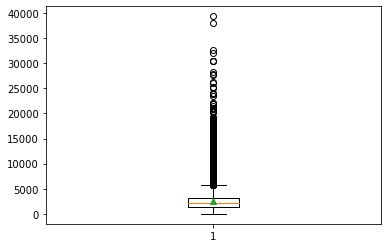

In [21]:
plt.boxplot(dataset["total_rooms"],showmeans=True)
plt.show()

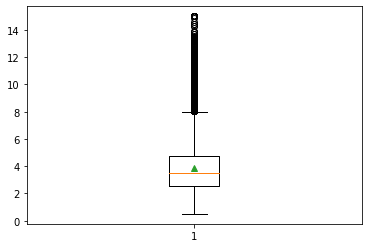

In [22]:
plt.boxplot(dataset["median_income"],showmeans=True)
plt.show()

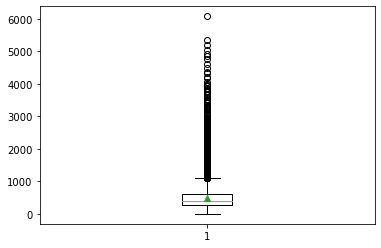

In [23]:
plt.boxplot(dataset["households"],showmeans=True)
plt.show()

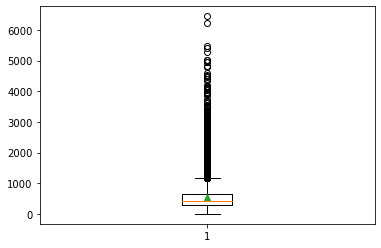

In [24]:
plt.boxplot(dataset["total_bedrooms"],showmeans=True)
plt.show()

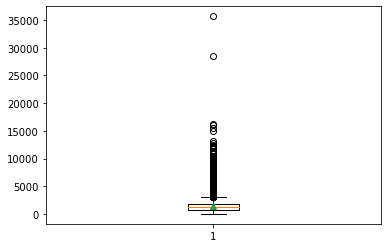

In [25]:
plt.boxplot(dataset["population"],showmeans=True)
plt.show()

In [26]:
dataset[dataset["median_income"]>9.5823].count()

longitude             344
latitude              344
housing_median_age    344
total_rooms           344
total_bedrooms        344
population            344
households            344
median_income         344
ocean_proximity       344
median_house_value    344
dtype: int64

In [27]:
dataset[dataset["total_rooms"]>9197].count()

longitude             372
latitude              372
housing_median_age    372
total_rooms           372
total_bedrooms        372
population            372
households            372
median_income         372
ocean_proximity       372
median_house_value    372
dtype: int64

In [28]:
dataset.drop(dataset[dataset["median_income"]>7.50].index,inplace = True)
dataset.drop(dataset[dataset["total_rooms"]>4500].index, inplace = True) 
dataset.drop(dataset[dataset["households"]>850].index, inplace = True) 
dataset.drop(dataset[dataset["total_bedrooms"]>850].index, inplace = True) 
dataset.drop(dataset[dataset["population"]>2400].index, inplace = True) 

In [29]:
dataset.shape

(16330, 10)

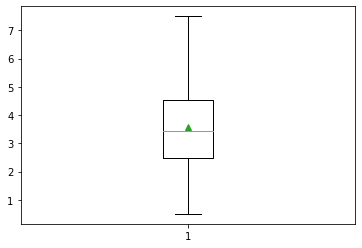

In [30]:
plt.boxplot(dataset["median_income"],showmeans=True)
plt.show()

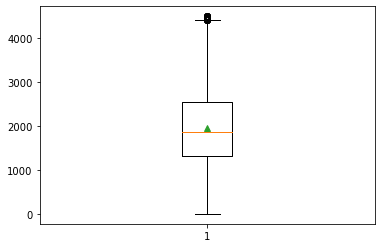

In [31]:
plt.boxplot(dataset["total_rooms"],showmeans=True)
plt.show()

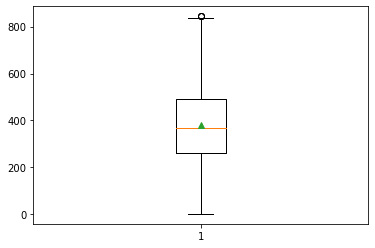

In [32]:
plt.boxplot(dataset["households"],showmeans=True)
plt.show()

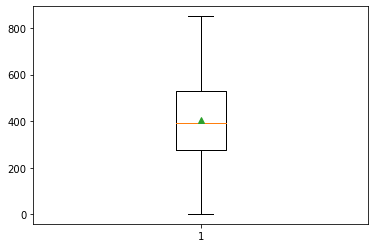

In [33]:
plt.boxplot(dataset["total_bedrooms"],showmeans=True)
plt.show()

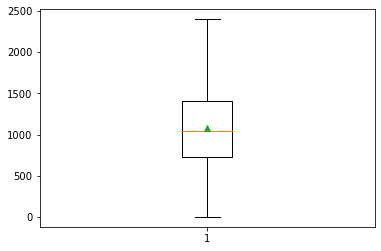

In [34]:
plt.boxplot(dataset["population"],showmeans=True)
plt.show()

# Standardization
## Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

In [35]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
dataset["total_rooms"]=scaling.fit_transform(dataset[["total_rooms"]])

In [36]:
dataset["median_income"]=scaling.fit_transform(dataset[["median_income"]])

In [37]:
dataset["population"]=scaling.fit_transform(dataset[["population"]])

In [38]:
A=scaling.fit_transform(A)

# Normalization
## Data normalization is the process of rescaling one or more attributes to the range of 0 to 1. This means that the largest value for each attribute is 1 and the smallest value is 0. Basically the requirement of Normalization is used where we want to eliminate the units in dataset like height of car in inches vs the weight of the car in Kg or Pound.

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
dataset["total_bedrooms"]=scaling.fit_transform(dataset[["total_bedrooms"]])

In [40]:
dataset["total_bedrooms"]=scaling.fit_transform(dataset[["total_bedrooms"]])

In [41]:
dataset["households"]=scaling.fit_transform(dataset[["households"]])

In [42]:
dataset["housing_median_age"]=scaling.fit_transform(dataset[["housing_median_age"]])

Text(0, 0.5, 'Count')

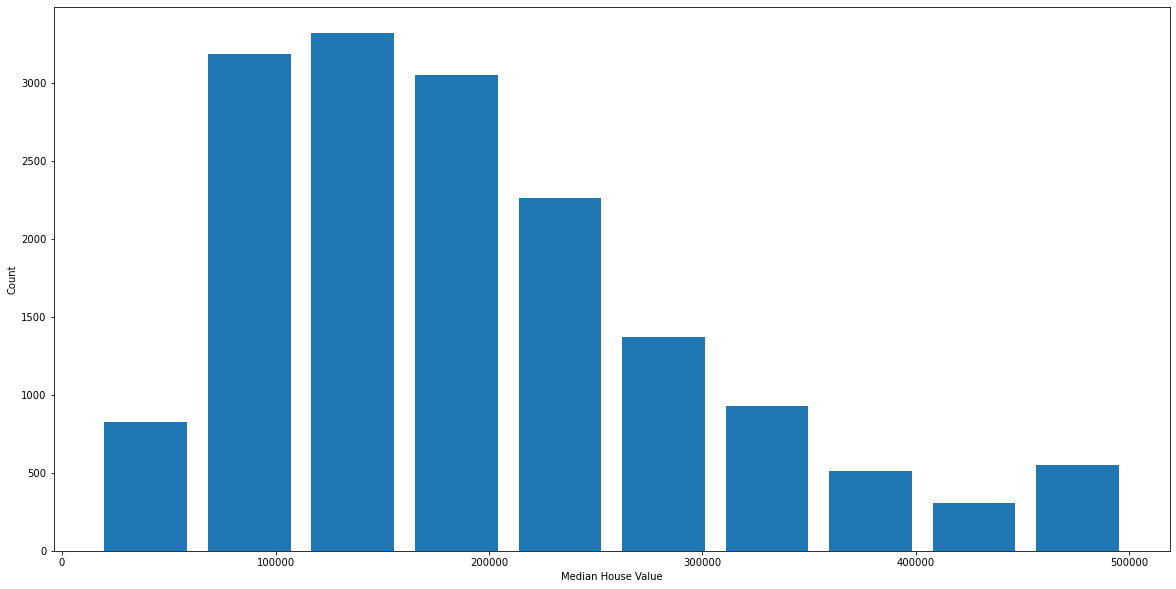

In [43]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(dataset.median_house_value,rwidth=0.8)
plt.xlabel("Median House Value")
plt.ylabel("Count")

##### Background Grid

In [44]:
sns.set()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

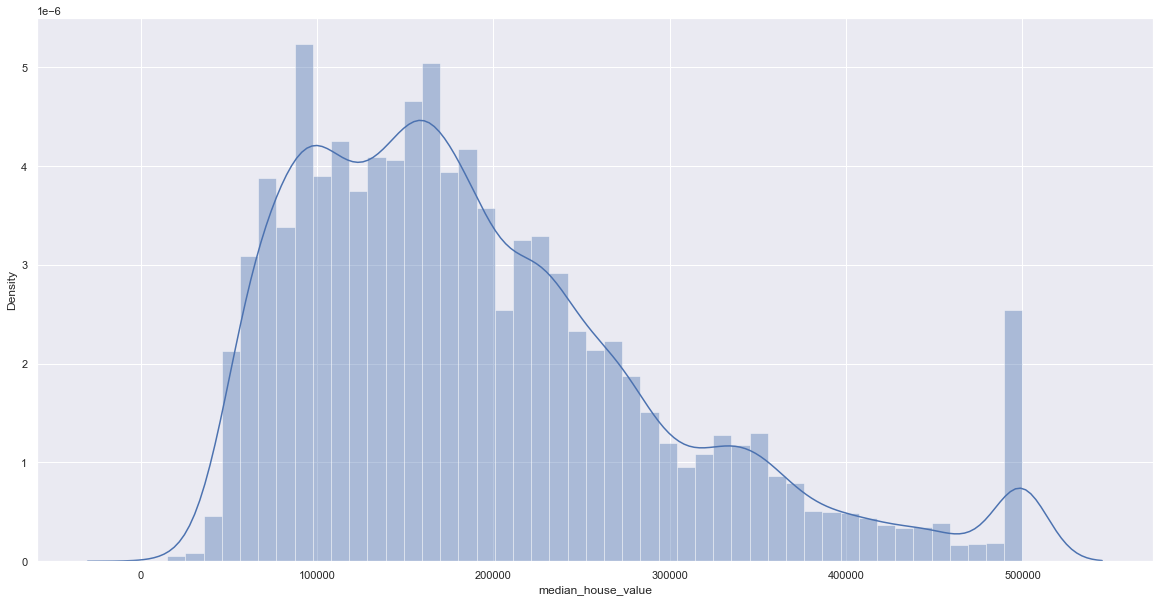

In [45]:
sns.distplot(dataset['median_house_value'])

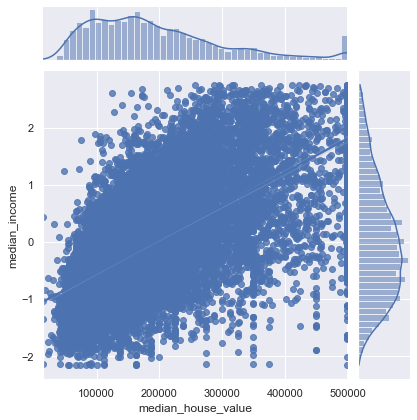

In [46]:
sns.jointplot(x='median_house_value',y='median_income',data=dataset,kind='reg')

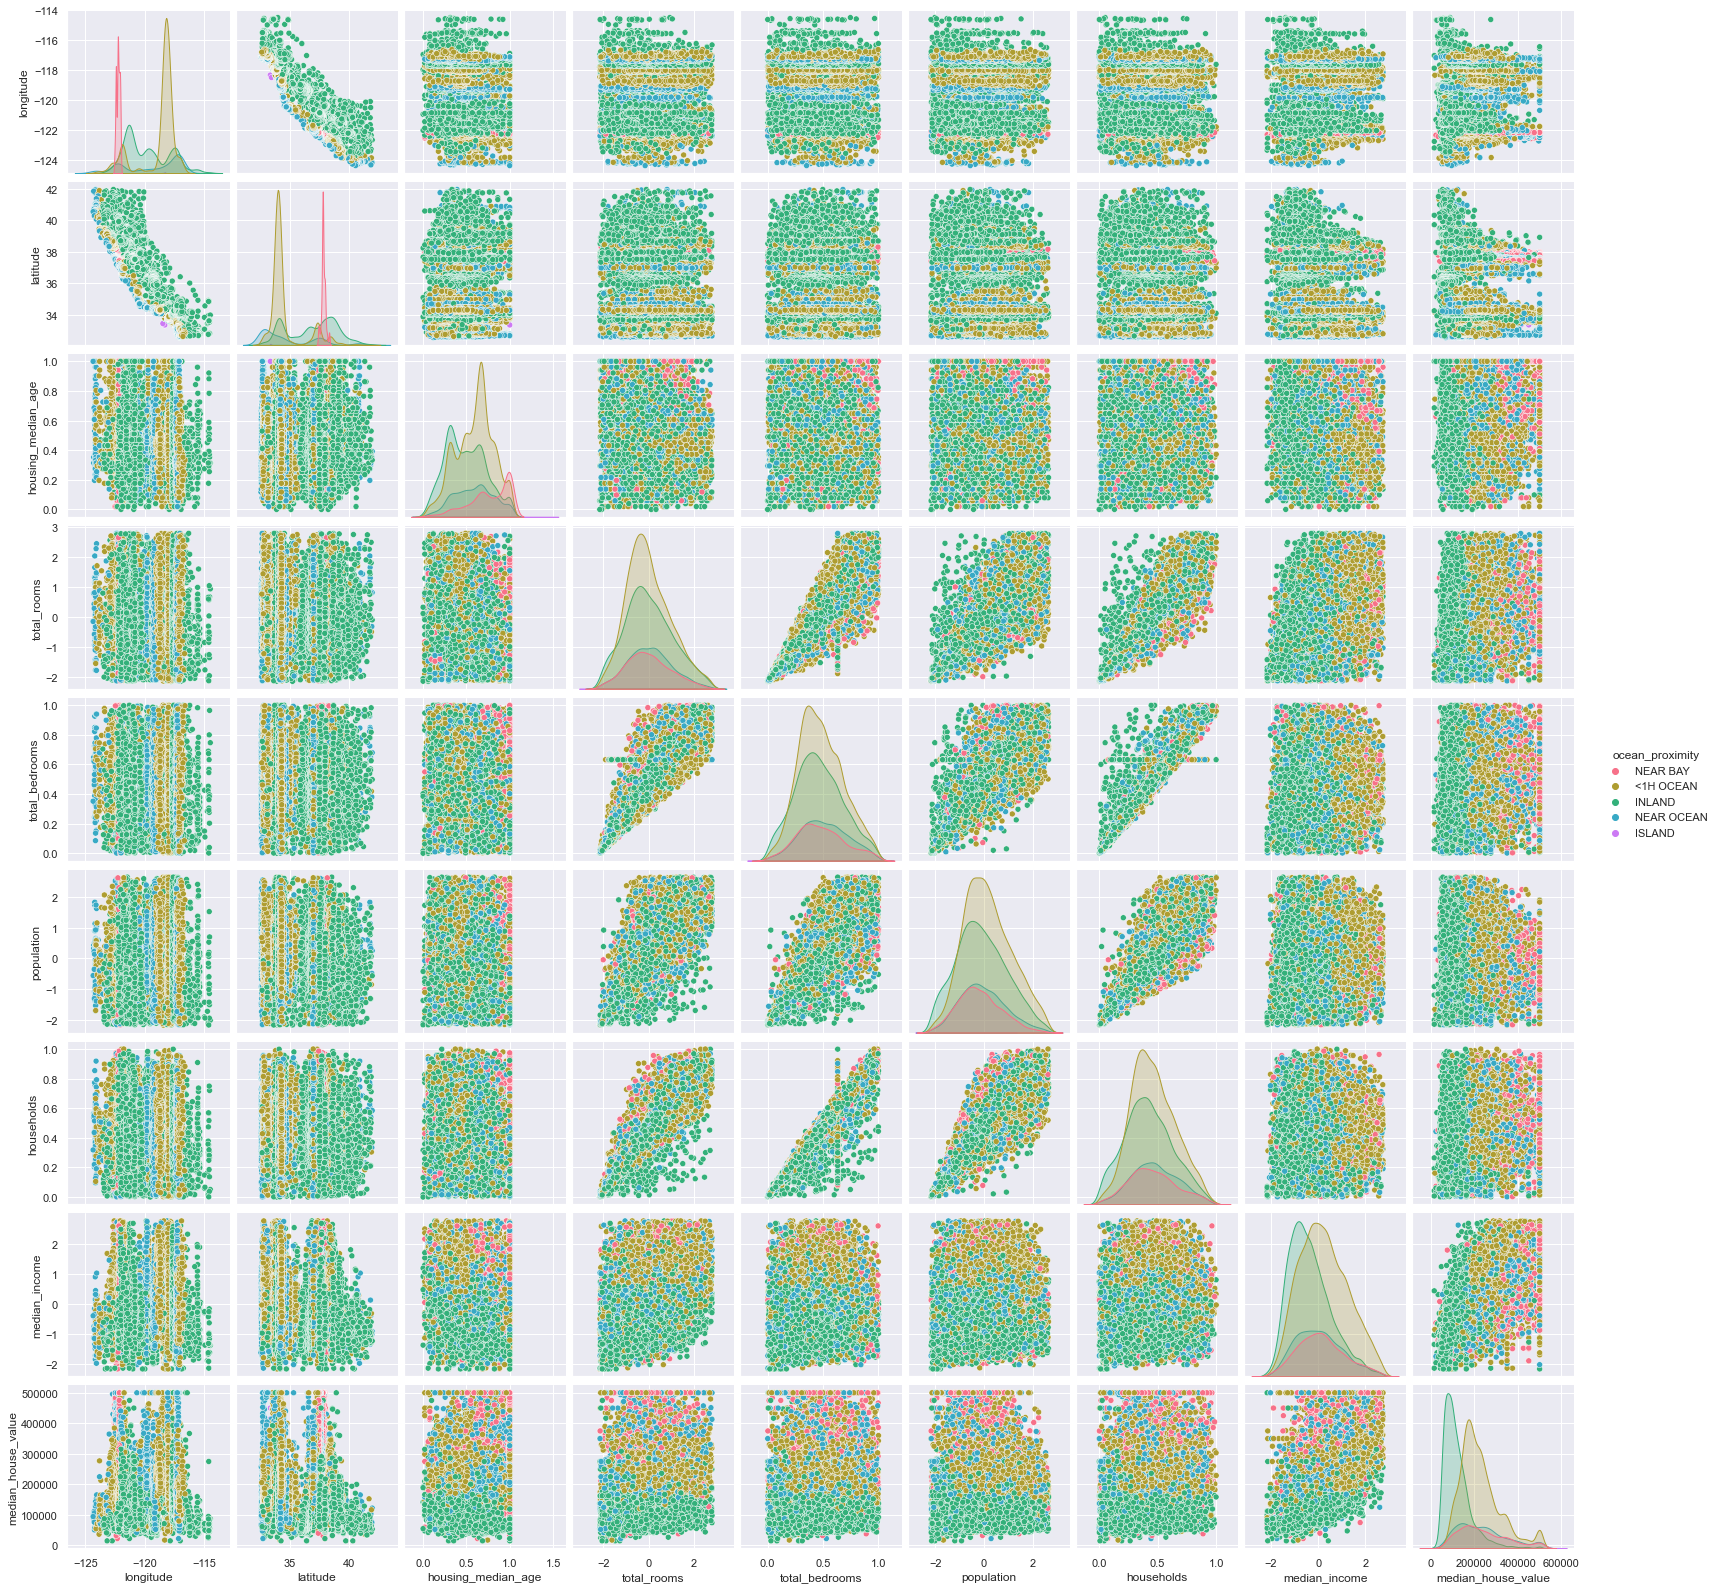

In [47]:
sns.pairplot(dataset,hue='ocean_proximity',palette="husl")

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

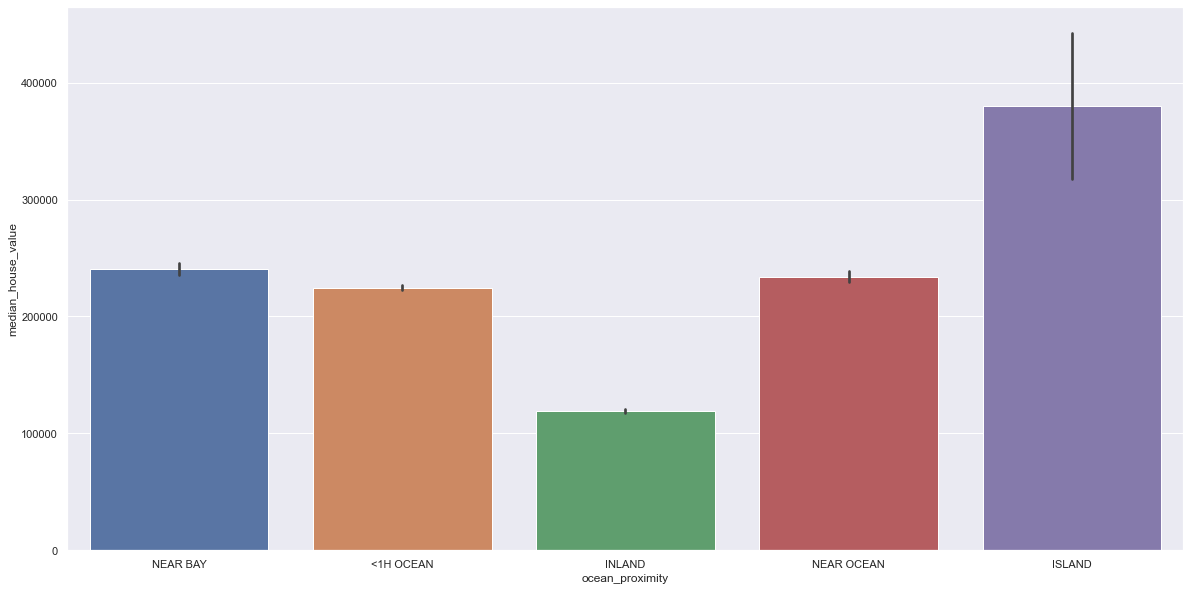

In [48]:
sns.barplot(x='ocean_proximity',y='median_house_value',data=dataset)

### Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related; taller people tend to be heavier than shorter people

In [49]:
dataset.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.922393           -0.085813    -0.022158   
latitude            -0.922393  1.000000           -0.020597     0.020016   
housing_median_age  -0.085813 -0.020597            1.000000    -0.223926   
total_rooms         -0.022158  0.020016           -0.223926     1.000000   
total_bedrooms       0.018634 -0.032567           -0.156188     0.871045   
population           0.110100 -0.138525           -0.137389     0.741656   
households           0.019465 -0.059693           -0.126958     0.872509   
median_income        0.002596 -0.102243           -0.127045     0.299845   
median_house_value  -0.028094 -0.167839            0.144783     0.178105   

                    total_bedrooms  population  households  median_income  \
longitude                 0.018634    0.110100    0.019465       0.002596   
latitude                 -0.032567   -0.138525   -0.059693      -0.102243   
housing_median_age       -0.156188   -0.137389   -0.126958      -0.127045   
total_rooms               0.871045    0.741656    0.872509       0.299845   
total_bedrooms            1.000000    0.791257    0.957708      -0.019218   
population                0.791257    1.000000    0.843922      -0.003218   
households                0.957708    0.843922    1.000000       0.029423   
median_income            -0.019218   -0.003218    0.029423       1.000000   
median_house_value        0.078973   -0.064808    0.102043       0.616221   

                    median_house_value  
longitude                    -0.028094  
latitude                     -0.167839  
housing_median_age            0.144783  
total_rooms                   0.178105  
total_bedrooms                0.078973  
population                   -0.064808  
households                    0.102043  
median_income                 0.616221  
median_house_value            1.000000

<AxesSubplot:>

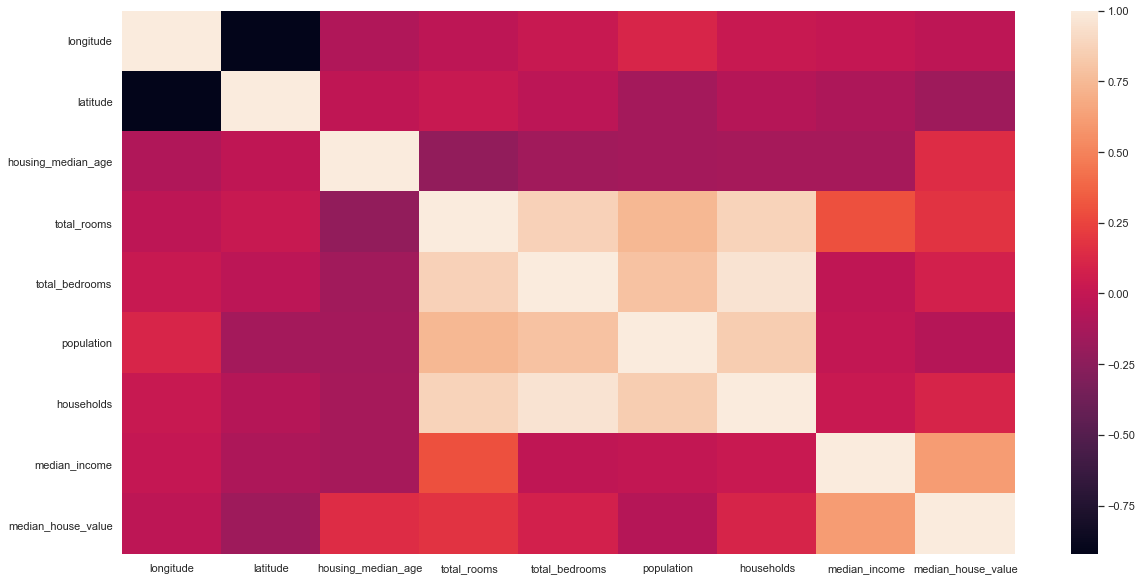

In [50]:
sns.heatmap(dataset.corr())

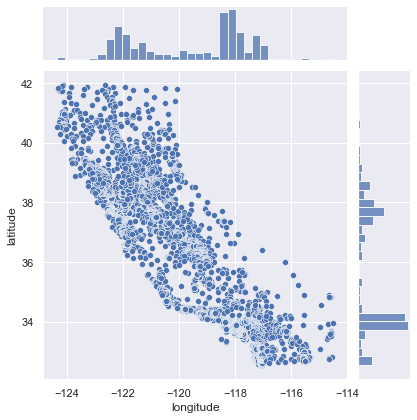

In [51]:
sns.jointplot(x="longitude",y="latitude",data=dataset,kind='scatter')

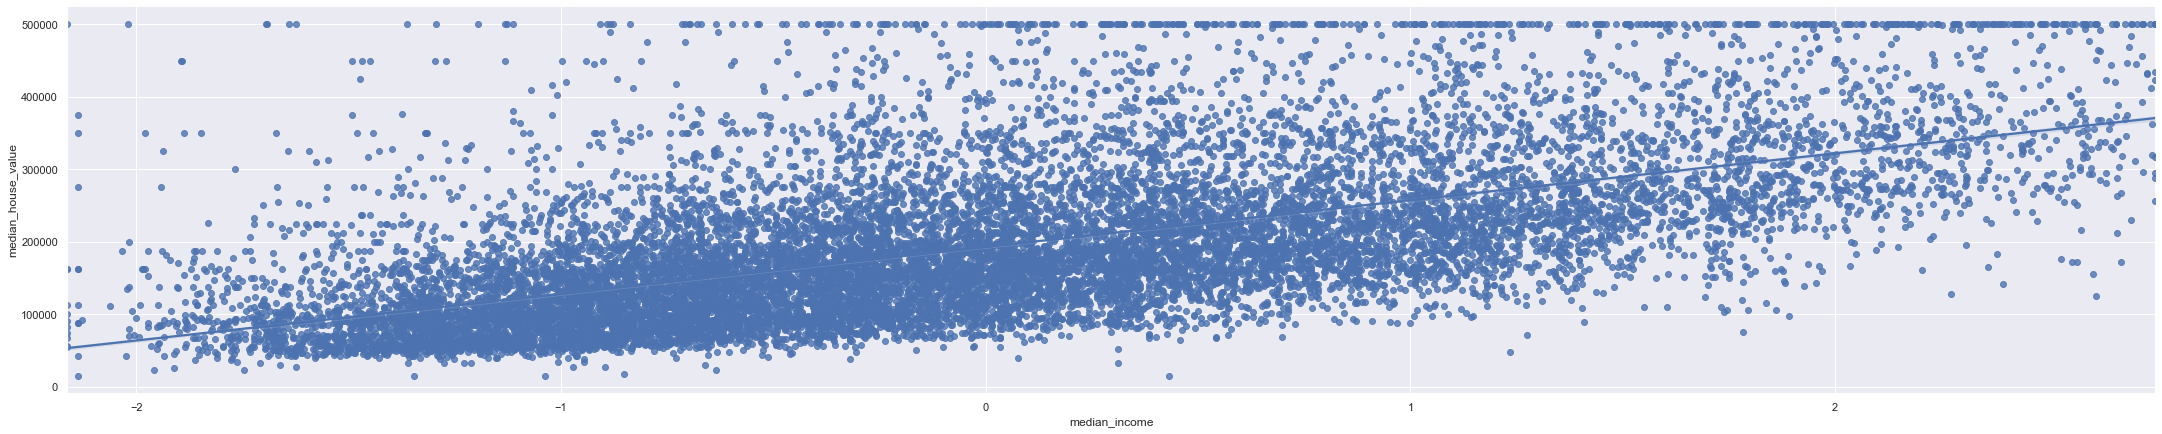

In [52]:
sns.lmplot(x='median_income',y='median_house_value',height=6,aspect=5,data=dataset)

# Label Encoding
## LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier. The categorical values have been converted into numeric values. That's all label encoding is about.

In [53]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [54]:
dataset.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -122.24     37.85                 1.0    -0.543828        0.221698   
3    -122.25     37.85                 1.0    -0.755823        0.274764   
4    -122.25     37.85                 1.0    -0.368081        0.327830   
5    -122.25     37.85                 1.0    -1.145762        0.248821   
6    -122.25     37.84                 1.0     0.629283        0.574292   

   population  households  median_income ocean_proximity  median_house_value  
2   -1.187289    0.207838       2.583150        NEAR BAY              352100  
3   -1.062093    0.257720       1.449630        NEAR BAY              341300  
4   -1.047958    0.305226       0.187892        NEAR BAY              342200  
5   -1.354889    0.226841       0.321727        NEAR BAY              269700  
6    0.020240    0.608076       0.056515        NEAR BAY              299200

In [55]:
dataset["ocean_proximity"]=LE.fit_transform(dataset["ocean_proximity"])

In [56]:
dataset.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -122.24     37.85                 1.0    -0.543828        0.221698   
3    -122.25     37.85                 1.0    -0.755823        0.274764   
4    -122.25     37.85                 1.0    -0.368081        0.327830   
5    -122.25     37.85                 1.0    -1.145762        0.248821   
6    -122.25     37.84                 1.0     0.629283        0.574292   

   population  households  median_income  ocean_proximity  median_house_value  
2   -1.187289    0.207838       2.583150                3              352100  
3   -1.062093    0.257720       1.449630                3              341300  
4   -1.047958    0.305226       0.187892                3              342200  
5   -1.354889    0.226841       0.321727                3              269700  
6    0.020240    0.608076       0.056515                3              299200

In [57]:
x=dataset.iloc[:,[0,1,2,3,4,5,6,7,8]]
y=dataset.iloc[:,9]

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

In [59]:
x_test.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1990     -119.80     36.73            0.862745    -1.139171        0.270047   
20052    -119.19     35.96            0.470588     0.057007        0.471698   
7596     -118.25     33.89            0.666667    -0.417510        0.458726   
8173     -118.11     33.80            0.686275    -0.137413        0.373821   
6120     -117.91     34.12            0.784314     0.780865        0.679245   

       population  households  median_income  ocean_proximity  
1990    -0.579486    0.268409      -1.318342                1  
20052    0.153512    0.427553      -1.192021                1  
7596     1.762876    0.477435      -0.789886                0  
8173    -0.553235    0.359857       0.569524                0  
6120     2.372698    0.700713       0.144638                0

In [60]:
print("Trainging feature shape:",x_train.shape)
print("Trainging label shape:",y_train.shape)
print("Testing feature shape:",x_test.shape)
print("Testing label shape:",y_test.shape)

Trainging feature shape: (13064, 9)
Trainging label shape: (13064,)
Testing feature shape: (3266, 9)
Testing label shape: (3266,)


# Linear Regression
## Linear Regression is a machine learning algorithm based on supervised learning. ... Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [61]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [62]:
lm.fit(x_train,y_train)

LinearRegression()

In [63]:
y_test

1990      44800
20052     52500
7596      91500
8173     235000
6120     145500
          ...  
14751    141100
19945     60000
3386     176700
2783     108300
12612    171200
Name: median_house_value, Length: 3266, dtype: int64

In [64]:
pred=lm.predict(x_test)
pred

array([ 79703.11547229,  72700.32735054,  93864.26719177, ...,
       199214.2719912 ,  46871.97823007, 184498.61092045])

In [65]:
lm.intercept_

-3262825.1949934913

In [66]:
lm.coef_

array([-39315.84175842, -39900.37243697,  57491.41654686, -19697.54641758,
       202386.34545765, -46312.30489819, 109682.00412668,  63679.85768041,
         -987.08642234])

In [67]:
from sklearn.metrics import r2_score

In [68]:
r2_score(y_test,pred)

0.6127732707467022

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.61207793, 0.60129629, 0.59199805, 0.63081823, 0.60002811])

#  Random forest
##  Random forest builds multiple decision trees and merge their predictions together to get a more accurate and stable prediction rather than relying on individual decision trees. Each tree in a random forest learns from a random sample of the training observations.

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [71]:
prediction=rf.predict(x_test)

In [72]:
errors=abs(prediction-y_test)

In [73]:
print("Mean absolute error:",round(np.mean(errors),2),"degrees")

Mean absolute error: 31505.44 degrees


In [74]:
mape=100*(errors/y_test)
accuracy=100-np.mean(mape)
print("Accuracy:",round(accuracy,2),"%")

Accuracy: 81.87 %


## Decision Tree - Regression
### Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [75]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=0)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [76]:
prediction2=tree_reg.predict(x_test)

In [77]:
errors=abs(prediction2-y_test)

In [78]:
print("Mean absolute error:",round(np.mean(errors),2),"degrees")

Mean absolute error: 43590.08 degrees


In [79]:
mape=100*(errors/y_test)
accuracy=100-np.mean(mape)
print("Accuracy:",round(accuracy,2),"%")

Accuracy: 75.8 %


## The accuraccy observed from linera regression is 61%, from Random forest is 80% and from decision tree it is 75% .
## So the most appropriate method is to use random forest 

# K-Means Clustering


## Here we have used Longitude Latitude for making the clusters 

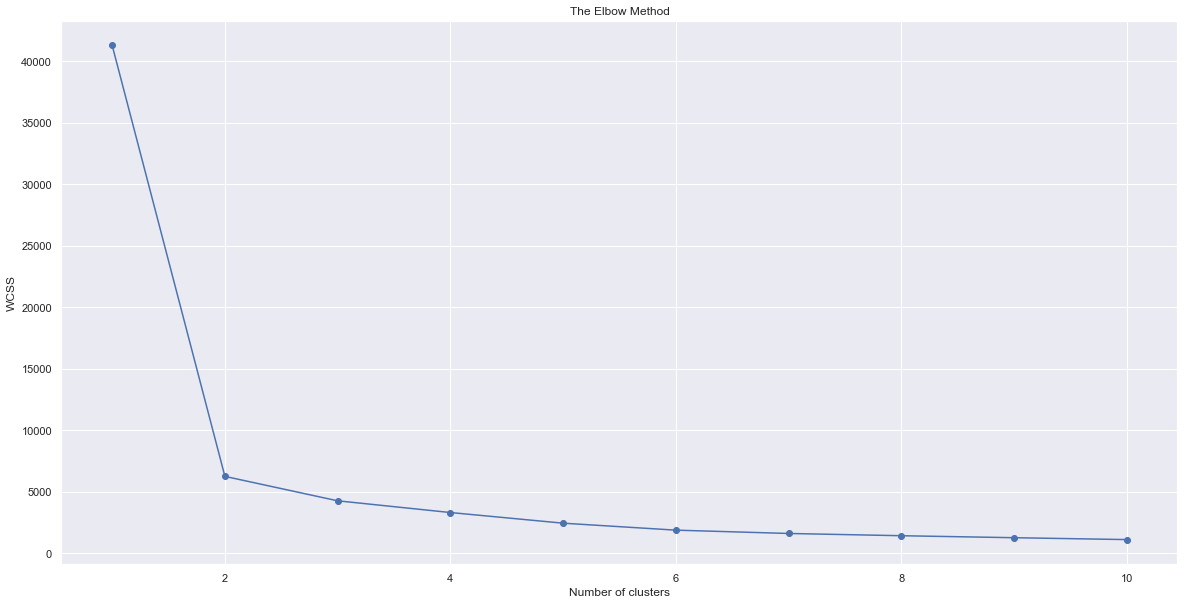

In [87]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(A)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset


In [88]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(A)

In [89]:
y_kmeans

array([1, 1, 1, ..., 3, 3, 3])

In [90]:
kmeans.cluster_centers_

array([[ 1.31118493, -1.19533909],
       [-1.14658984,  1.03789685],
       [ 0.72133628, -0.75764145],
       [-1.39202683,  2.01932214],
       [-0.06579514,  0.17559161]])

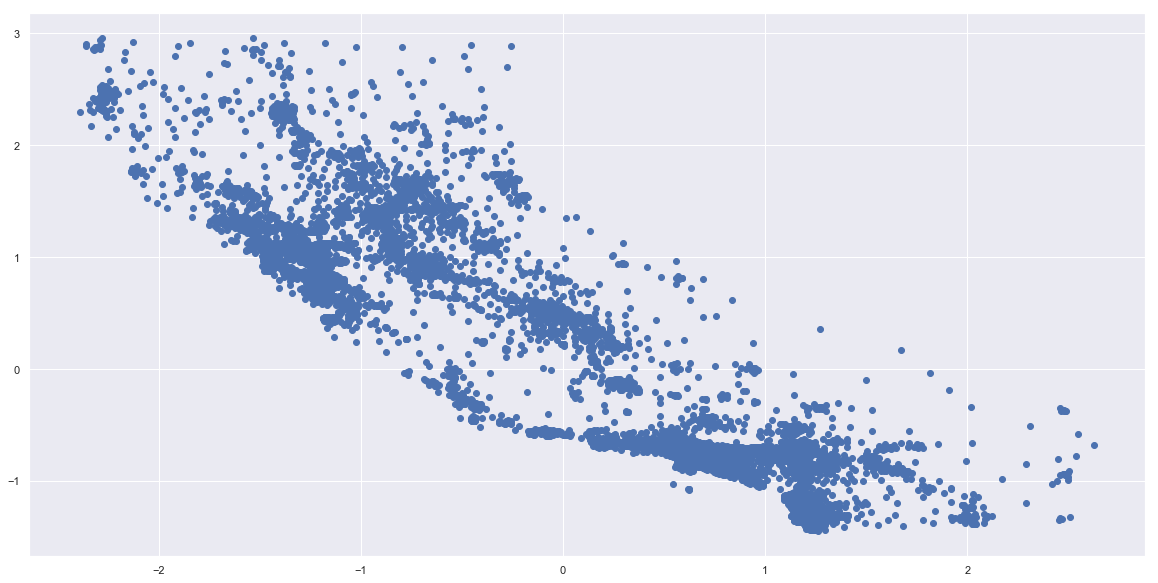

In [91]:
A[:,0]#Annual Income
plt.scatter(A[:,0],A[:,1])#Annual Income, Spending Score

In [92]:
A

array([[-1.32783522,  1.05254828],
       [-1.32284391,  1.04318455],
       [-1.33282653,  1.03850269],
       ...,
       [-0.8237132 ,  1.77823747],
       [-0.87362627,  1.77823747],
       [-0.83369581,  1.75014627]])

## Visualising the clusters


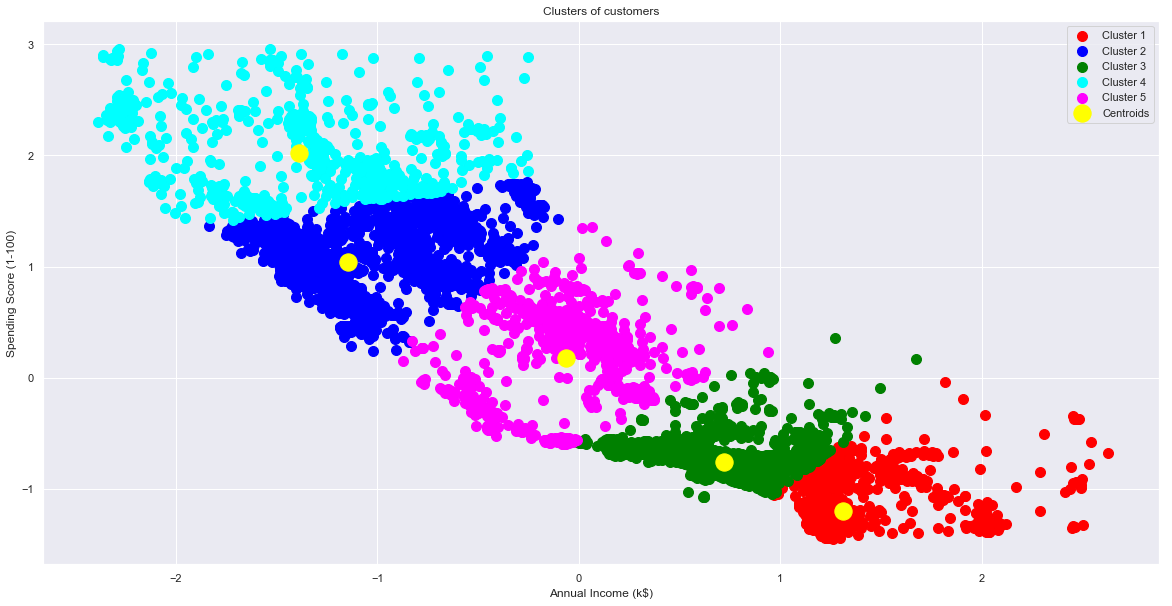

In [93]:
plt.scatter(A[y_kmeans == 0, 0], A[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(A[y_kmeans == 1, 0], A[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(A[y_kmeans == 2, 0], A[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(A[y_kmeans == 3, 0], A[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(A[y_kmeans == 4, 0], A[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Thank You

# Nidhi Yadav

In [82]:
import joblib
joblib.dump(rf,"Real_estate.pkl")

['Real_estate.pkl']